# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
TRAIN_classes = 'alpha-classes'

data_config = {
  "data_unit" : sup.DATA_S_PF,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 256,
  "PH2" : False,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : 72,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_MINI,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 5000
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,class_numeric,h0x,h0y,h0z,h1x,h1y,h1z,h2x,h2y,h2z,...,h20z,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z
216,0,-1.283628,0.802229,-1.045582,-1.290687,0.665518,0.129543,-1.330585,0.488937,0.509419,...,1.770974,0.652526,1.161940,-0.402526,0.218980,1.834775,-0.056609,0.219519,1.584173,-0.215969
218,0,-1.317559,0.791381,-0.920571,-1.313086,0.665617,0.175402,-1.346513,0.489708,0.573010,...,1.760070,0.791119,1.180680,-0.456191,0.134449,1.792358,0.055820,0.224852,1.460889,-0.406212
220,0,-1.330875,0.754141,-0.990114,-1.325971,0.642379,0.226444,-1.355508,0.473094,0.620791,...,1.632348,0.732060,1.189698,-0.587945,0.224337,1.846661,-0.152548,0.264720,1.466082,-0.456884
222,0,-1.337606,0.718191,-0.948056,-1.334871,0.615657,0.263483,-1.363479,0.464551,0.607272,...,1.537848,0.702752,1.156510,-0.622545,0.172091,1.857391,-0.174060,0.335450,1.415630,-0.523701
224,0,-1.346339,0.715464,-0.880718,-1.337709,0.624287,0.218734,-1.359744,0.472442,0.593357,...,1.576015,0.780635,1.247169,-0.397555,0.163425,1.897513,0.070743,0.279659,1.561615,-0.218597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91742,27,1.224940,0.808623,-1.435537,1.219332,0.831181,-0.577266,1.189246,0.815884,-0.761734,...,0.653221,-0.396603,0.532978,0.302194,-0.131394,0.989001,0.761561,-0.660326,1.211241,0.505064
91744,27,1.223369,0.817799,-1.403803,1.214153,0.876817,-0.789848,1.174974,0.904148,-1.017004,...,0.424173,-0.356376,0.553538,0.238981,-0.140404,1.023578,0.714862,-0.694331,1.217938,0.447033
91746,27,1.193231,0.779841,-1.577713,1.214981,0.840477,-1.477534,1.177418,0.870993,-1.793483,...,0.299896,-0.328180,0.556261,0.212260,-0.093431,1.050702,0.686253,-0.709568,1.202528,0.322172
91747,27,1.206619,0.823925,-1.488565,1.247771,0.856346,-1.166229,1.249347,0.811537,-1.397708,...,-0.001494,-0.384317,0.492491,0.315991,-0.157921,1.044061,0.880449,-0.780338,1.229865,0.393131


In [7]:
model.fit(verbose=True)

In [8]:
model.test()
model.full_score()

0.9677966101694915
0.9895480225988701
0.9678294319540218
0.9681459884381199
0.9677484406165883


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:205: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


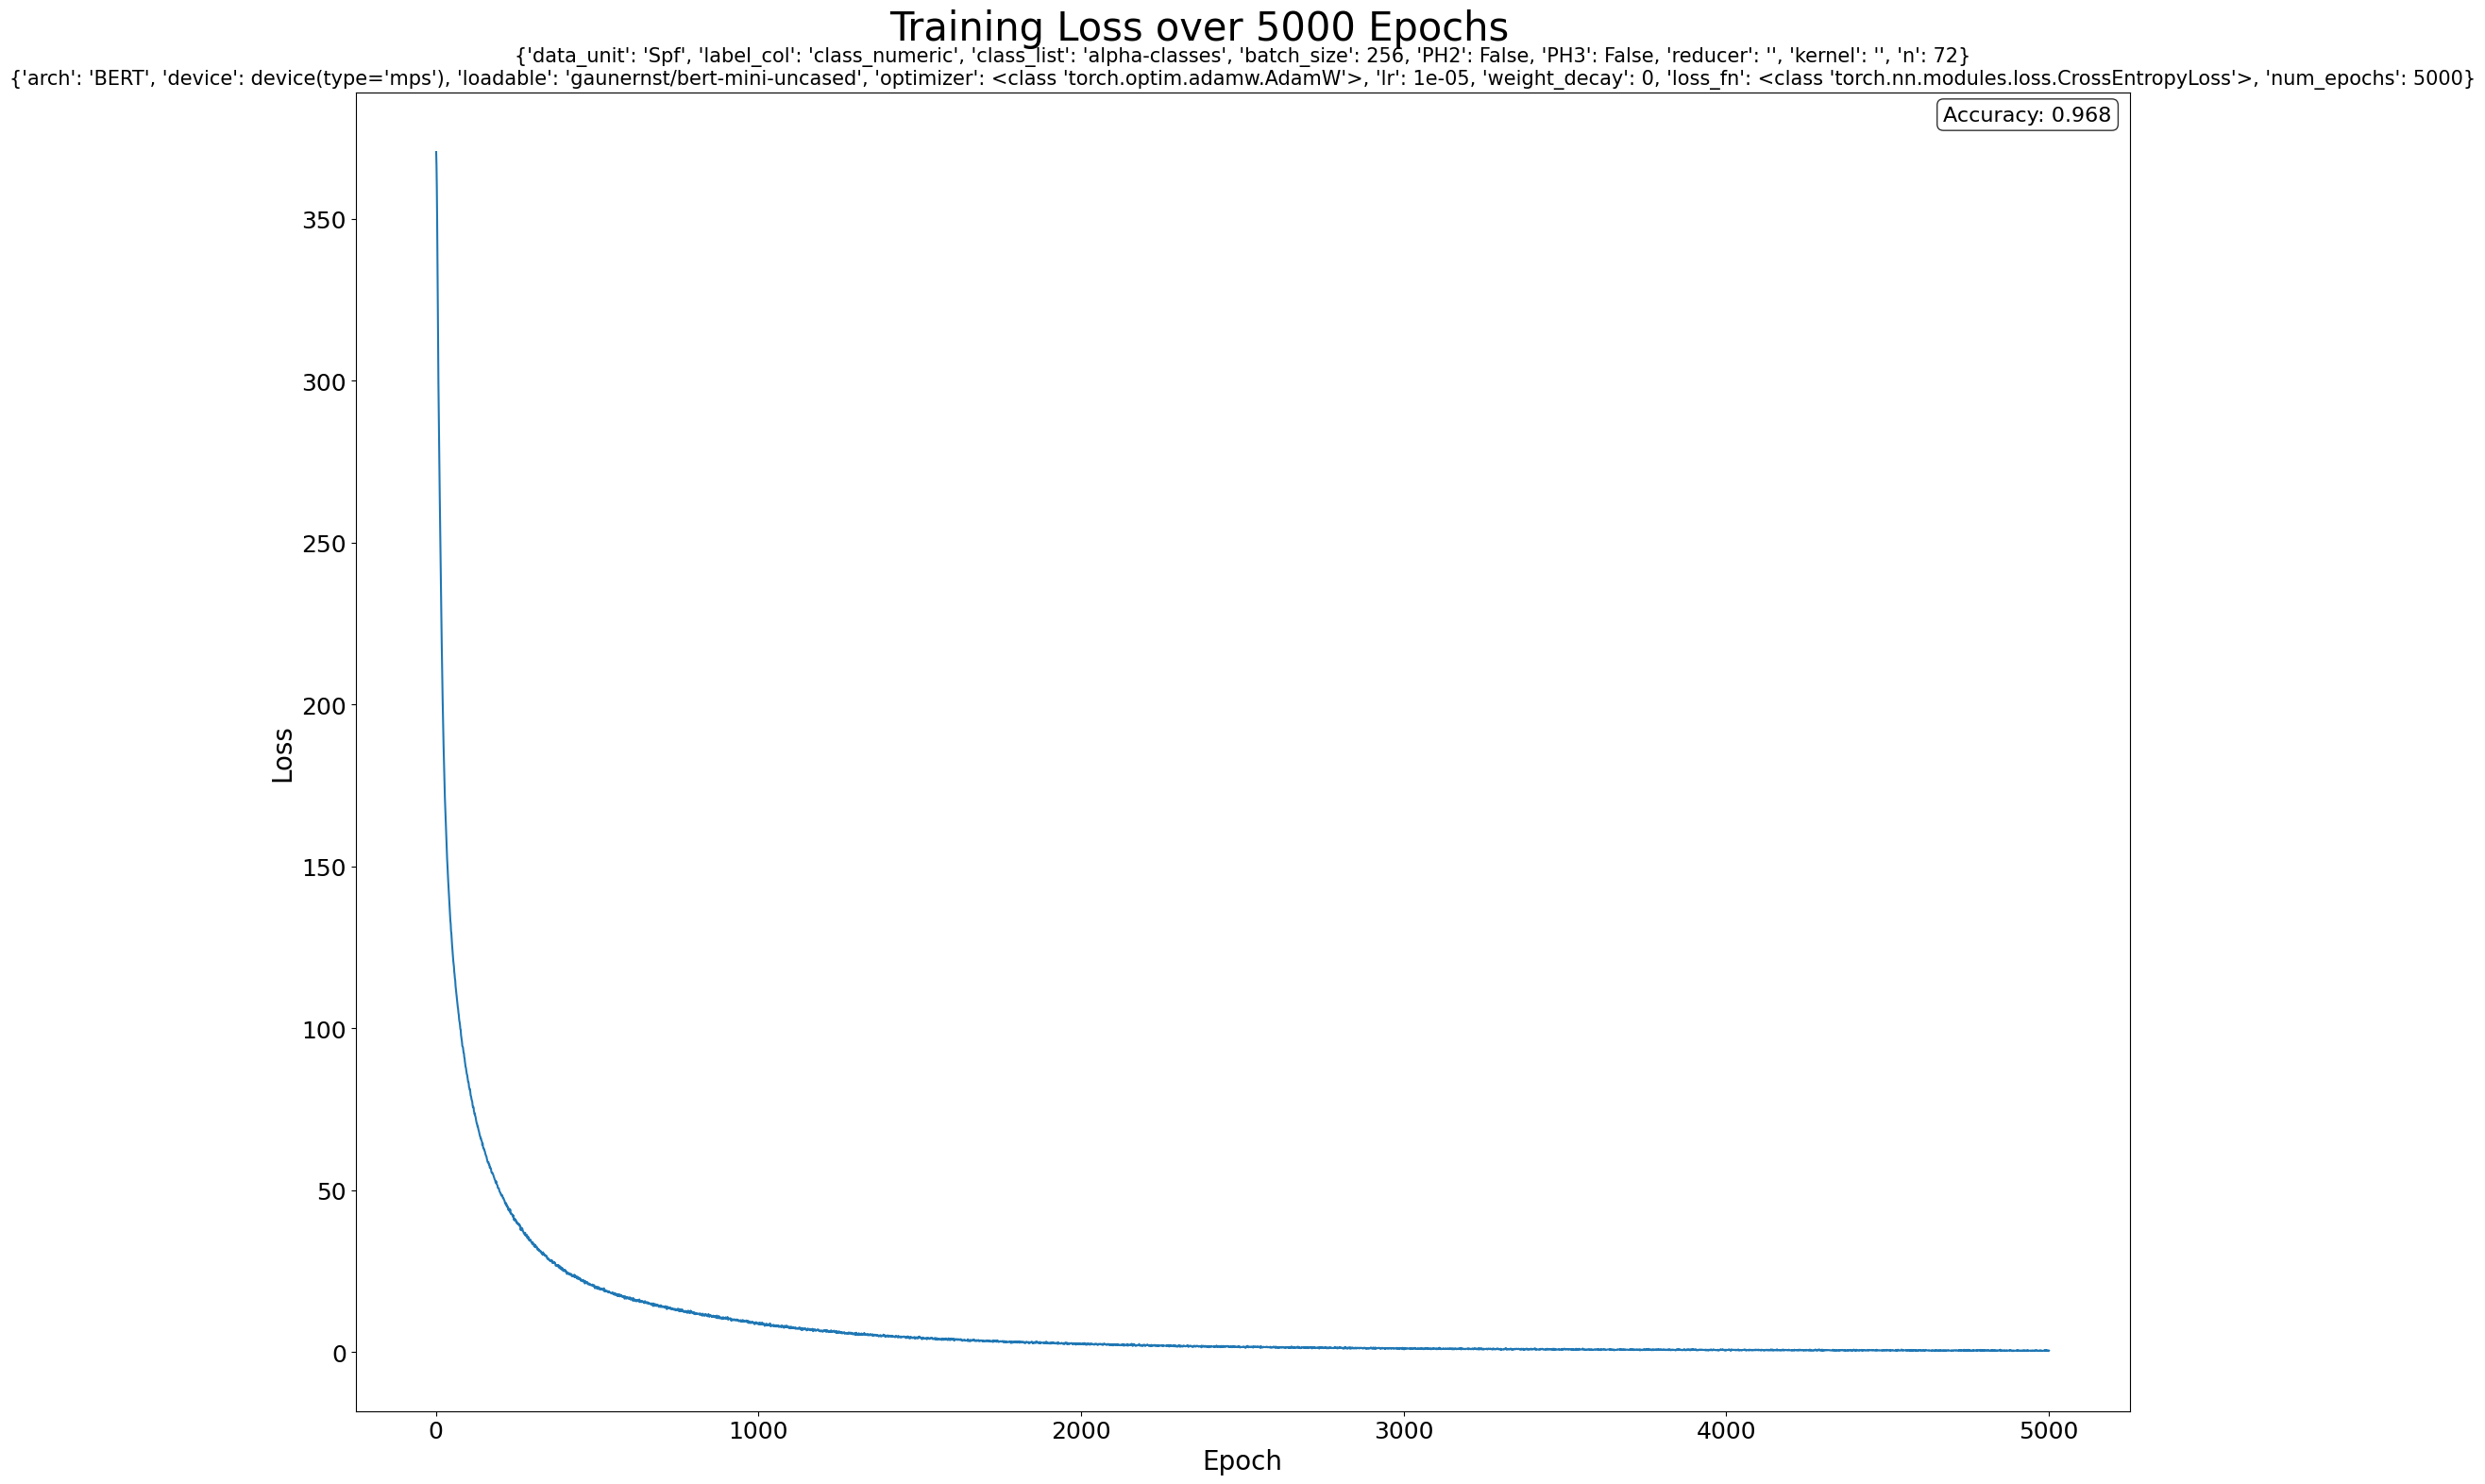

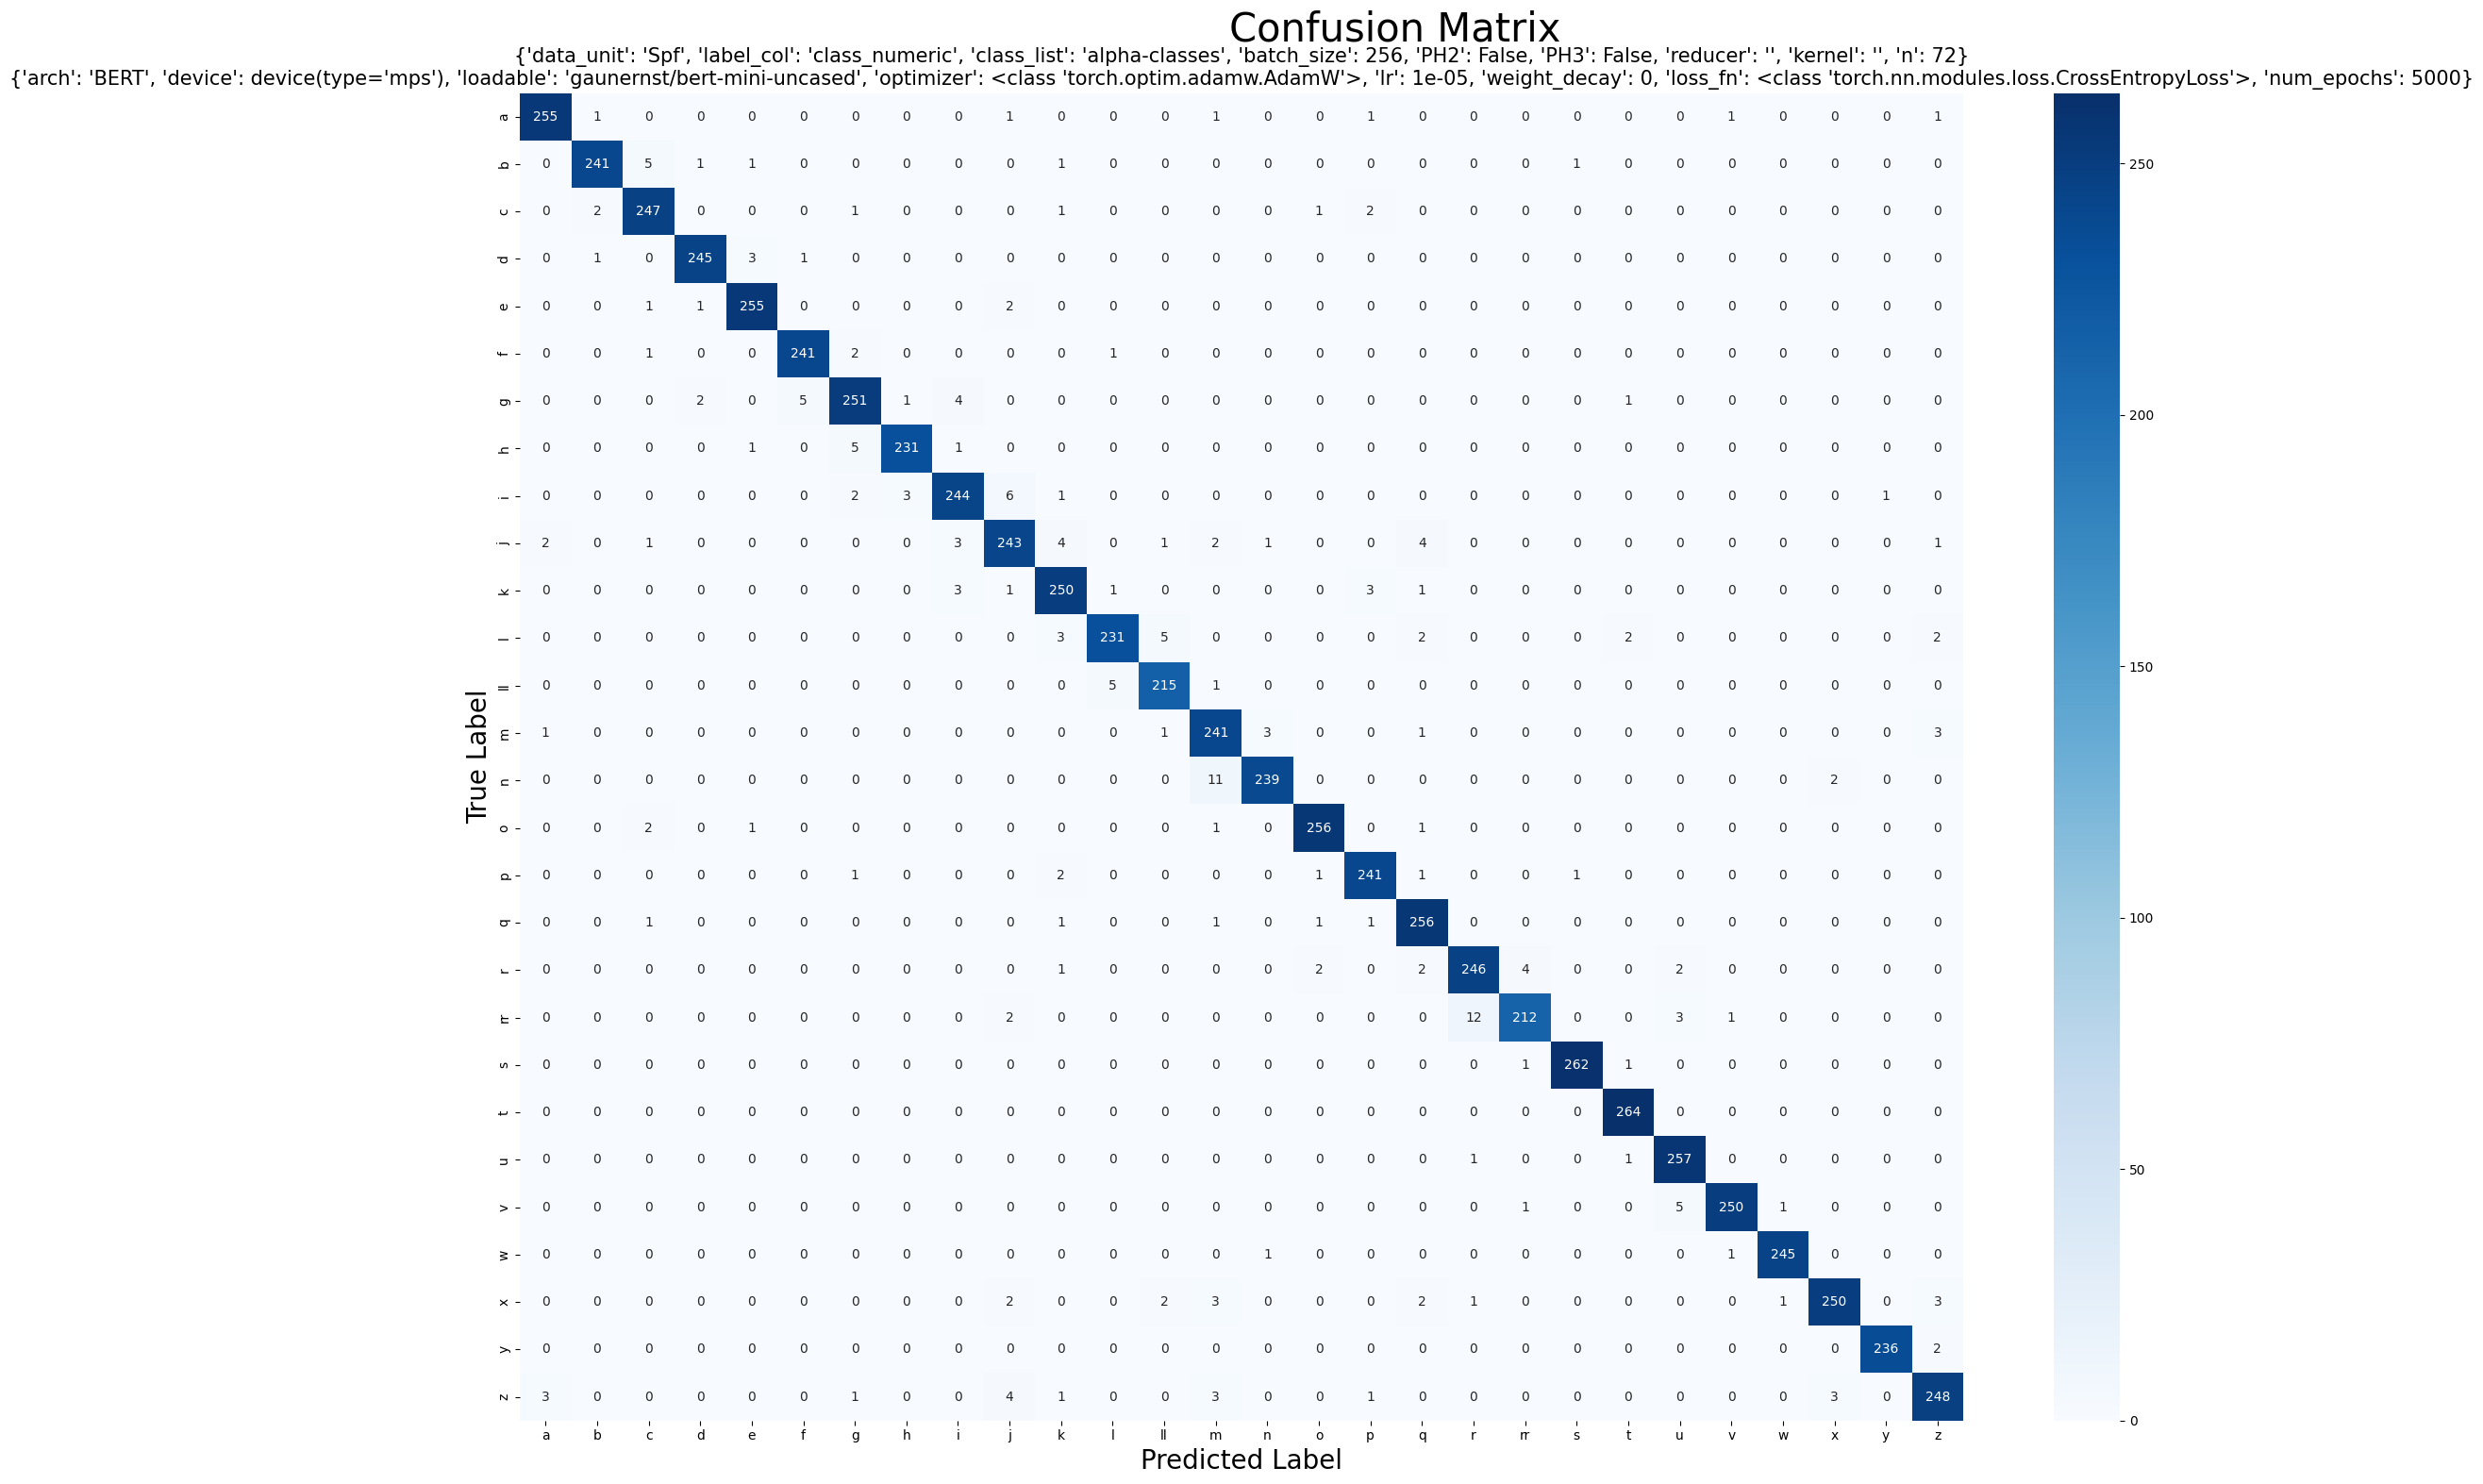

In [9]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

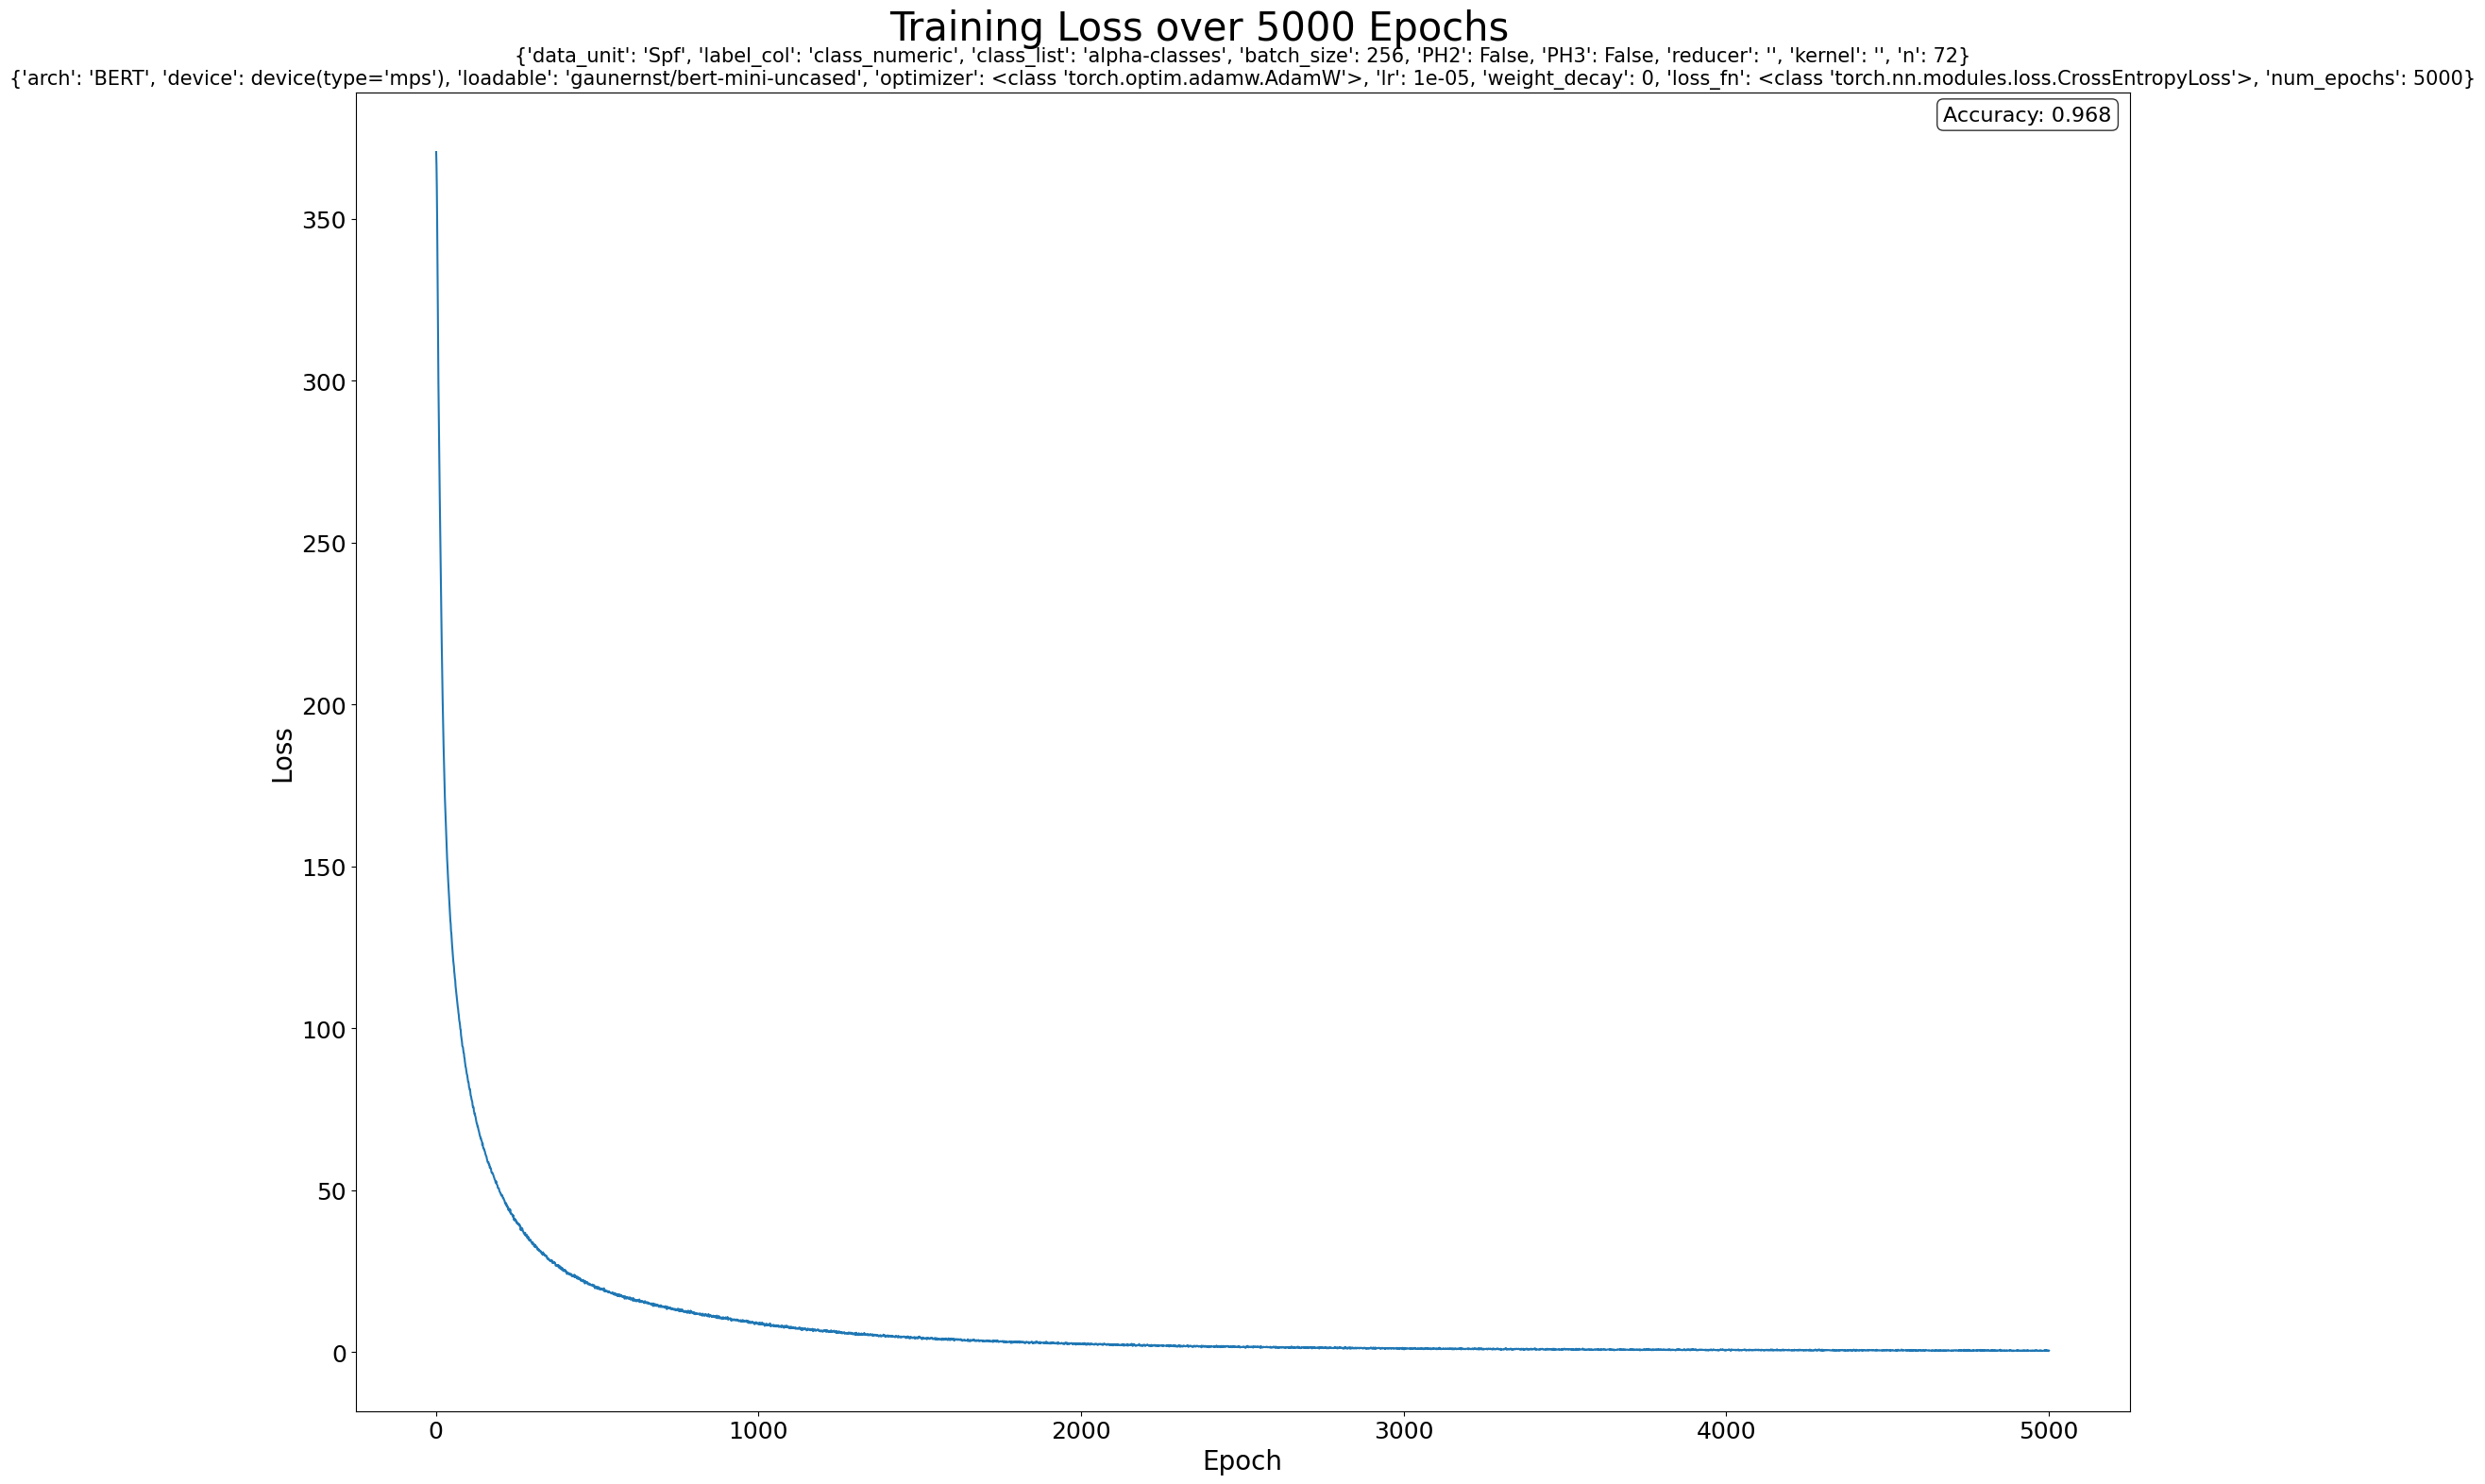

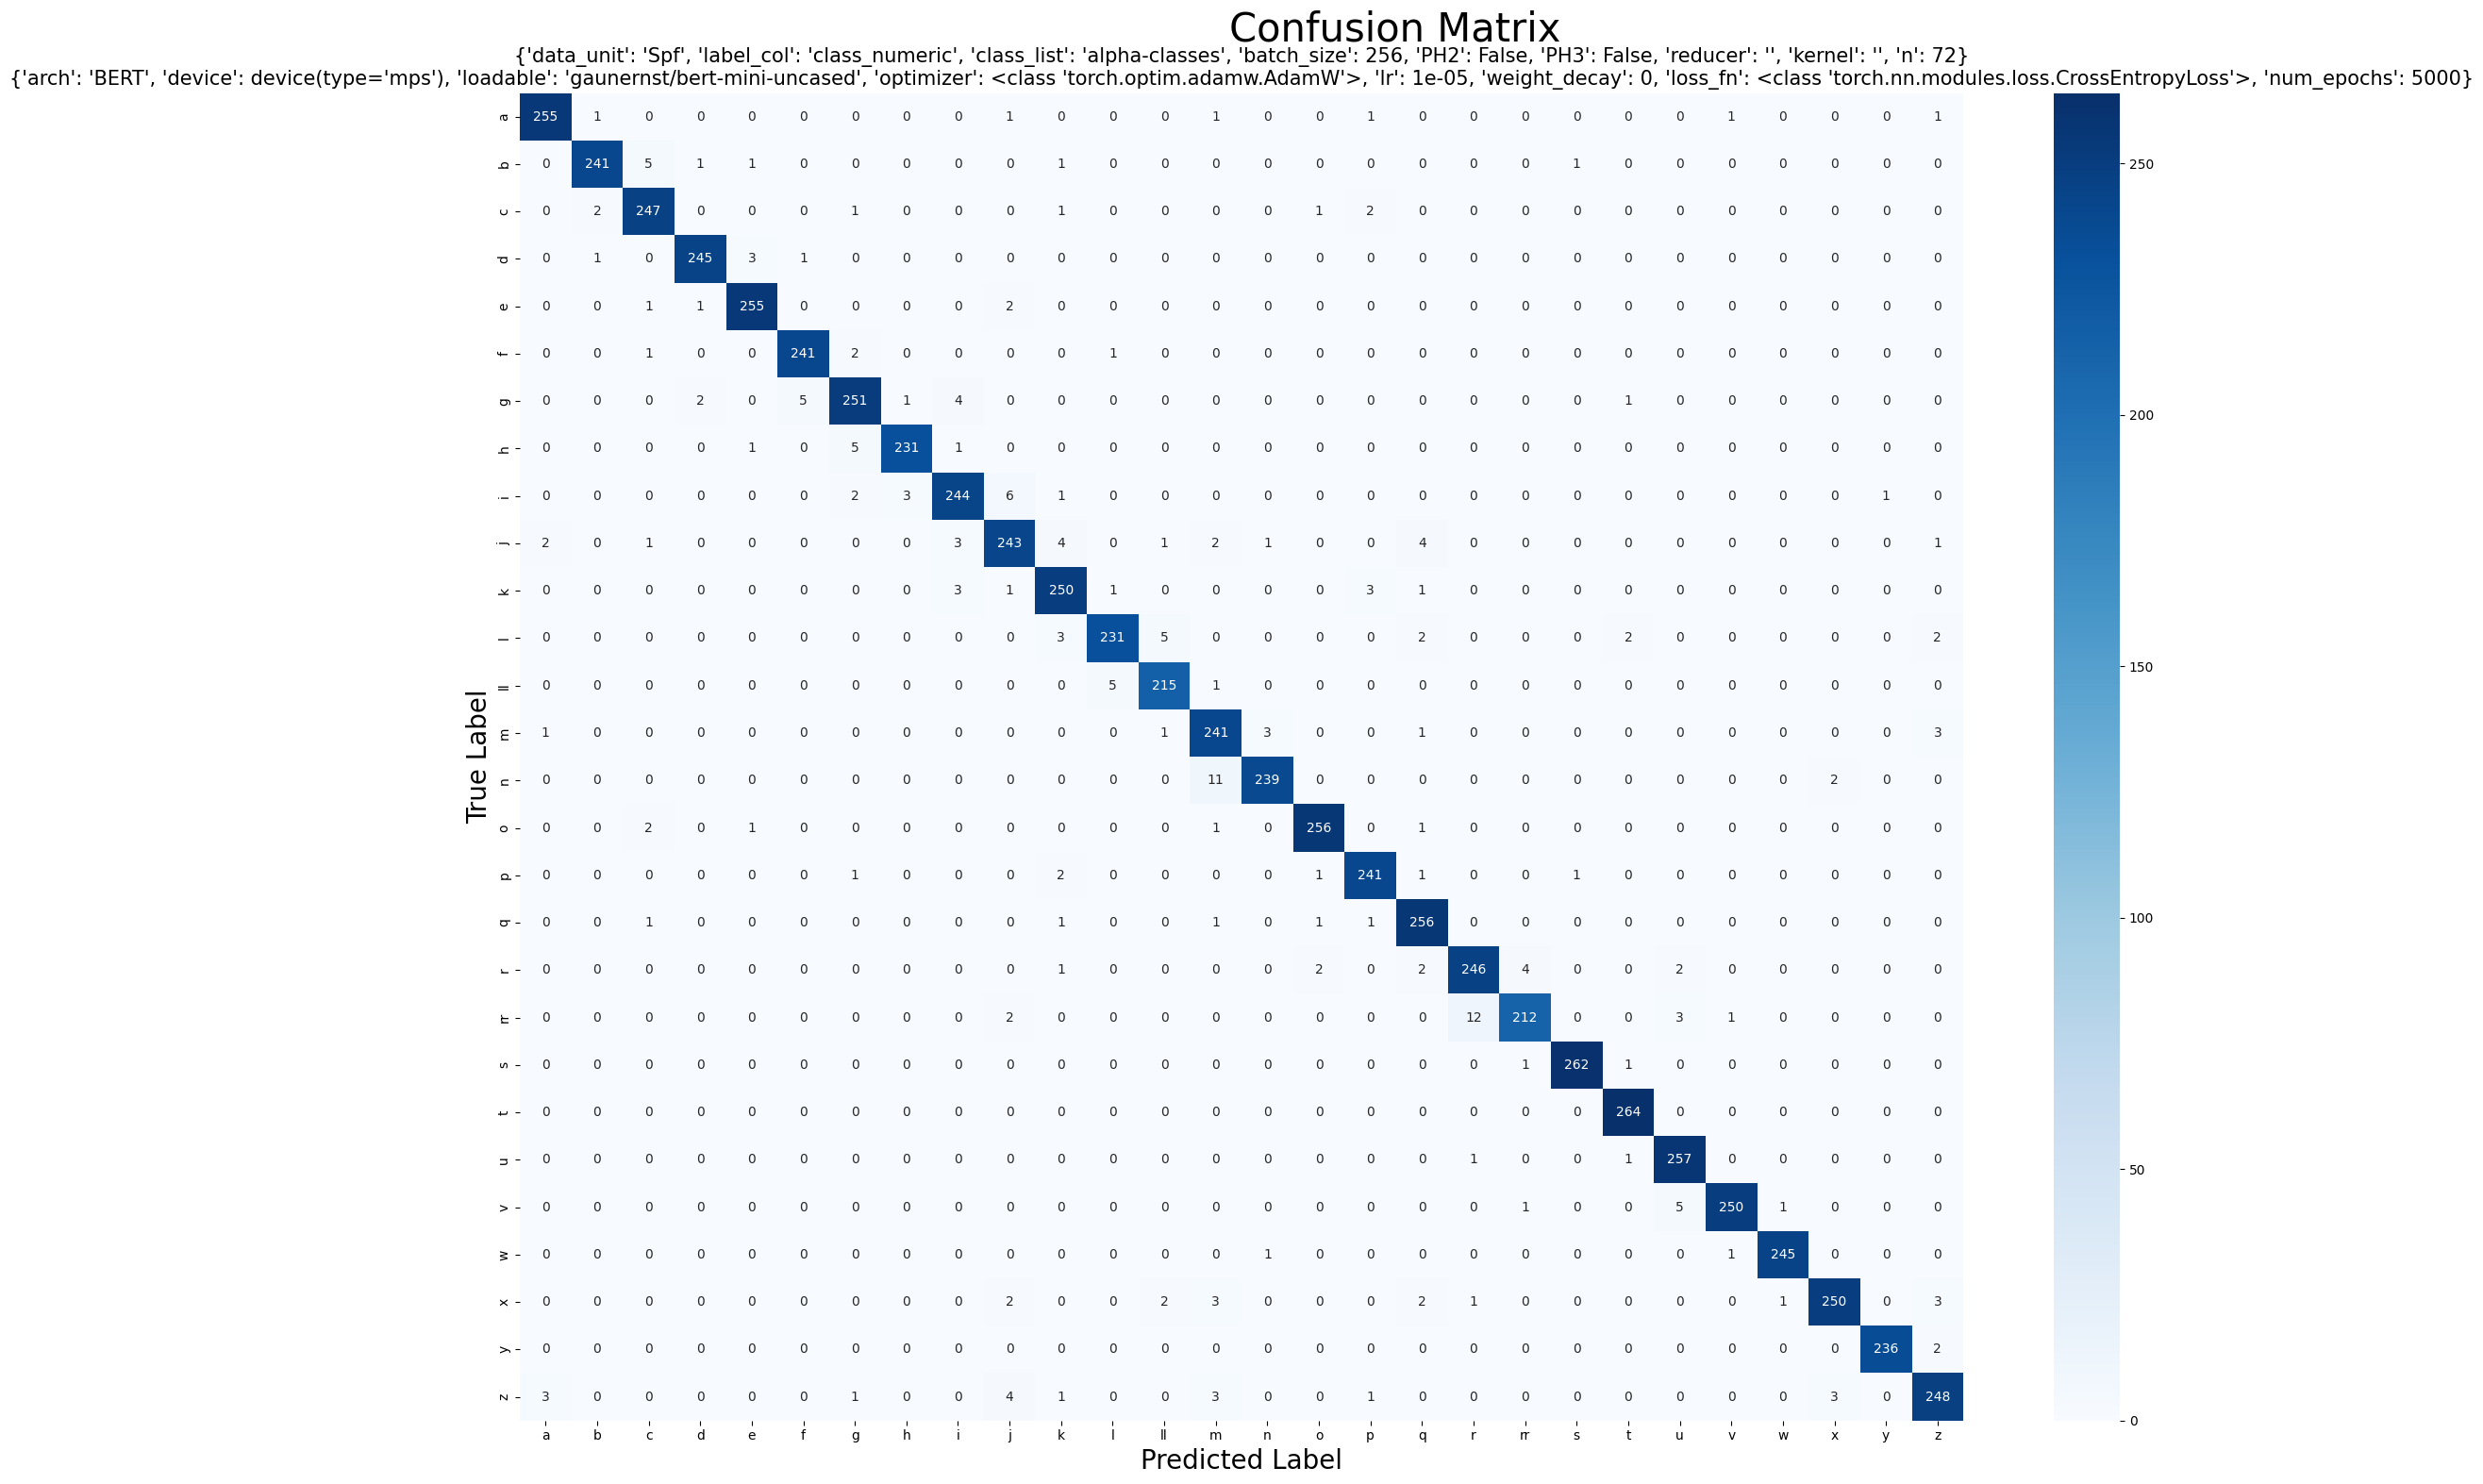

In [10]:
model.keep()
#bert.clean_bert()